In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('D:\\Github\\Exploratory-Data-Analysis-EDA-Projects\\Customer-Churn-Analysis\\data\\raw\\Telco Churn.csv')

---
# **Phase 1: Data Overview and Understanding**

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

### **Capitalize Column Names**

In [7]:
df.rename(columns={'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'},inplace=True)

### **Detecting Duplicates**

In [8]:
df['CustomerID'].duplicated().value_counts()
df.duplicated().value_counts()
df.duplicated().sum()

np.int64(0)

### **Target Variable**

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### **Identifier Column**

In [10]:
df['CustomerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: CustomerID, Length: 7043, dtype: object

### **Categorical Columns**

In [11]:
cat_cols=df[['Gender','Contract','PaymentMethod']]

### **Numerical Columns**

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df[['Tenure','MonthlyCharges','TotalCharges']].dtypes
num_cols=df[['Tenure','MonthlyCharges','TotalCharges']]

### **Detecting Missing Values**


In [13]:
df.isna().value_counts()
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df.loc[df['TotalCharges'].isna(),['Tenure','TotalCharges','Churn']].head(20)
df.loc[df['TotalCharges'].isna(),'Tenure'].value_counts()


Tenure
0    11
Name: count, dtype: int64

In [15]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
num_cols.apply(lambda x : x<0).sum()

Tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

### Phase 1 – Key Observations

* The Telco Customer Churn dataset contains 7,043 rows and 21 columns.
* The dataset includes an identifier column (`CustomerID`), which is not useful for analytical modeling.
* Numerical features include: `tenure`, `MonthlyCharges`, and `TotalCharges`.
* Categorical features include: `gender`, `Contract`, and `PaymentMethod`.
* No duplicate rows or duplicate customer IDs were found in the dataset.
* The `TotalCharges` column was initially stored as an object data type and was converted to a numeric type.
* The dataset contains no missing values, except for the `TotalCharges` column, which has 11 missing (NaN) values.
---

---
# **Phase 2: Target Variable Analysis (Churn)**

### **Count Of Churn Customers**

In [17]:
df['Churn'].value_counts().reset_index()


,Churn,count
0,No,5174
1,Yes,1869


### **Percentage Of Churn Customers**


In [18]:
proportion_of_churn=df['Churn'].value_counts(normalize=True)*100
proportion_of_churn=proportion_of_churn.reset_index()
proportion_of_churn.columns=['Churn','Percentage']
proportion_of_churn

,Churn,Percentage
0,No,73.463013
1,Yes,26.536987


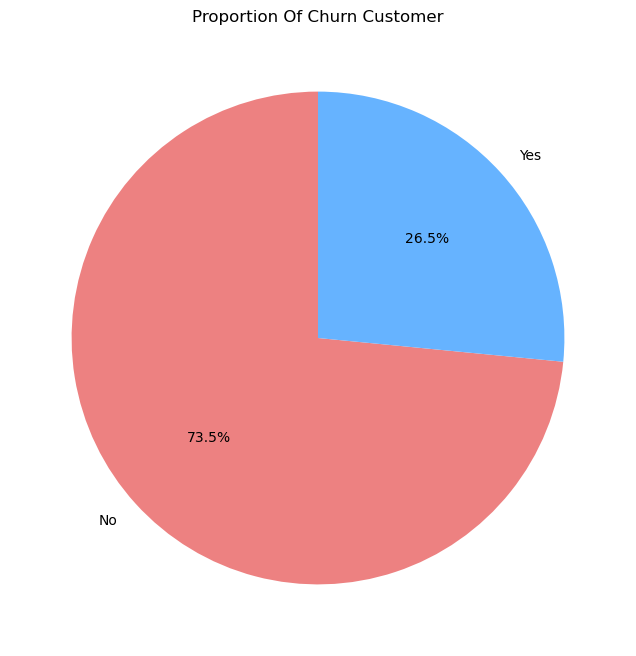

In [19]:
plt.figure(figsize=(8,8))
plt.pie(proportion_of_churn['Percentage'],labels=proportion_of_churn['Churn'],autopct='%1.1f%%',colors=["#ed8181",'#66b3ff'],startangle=90)
plt.title('Proportion Of Churn Customer')
plt.show()

### Phase 2 - Key Observations
* Out of **7,043 customers**, **1,869 customers** churned, while **5,174 customers** remained with the company.
* The overall **churn rate is approximately 26.5%**.
* A churn rate of nearly **one-quarter of the customer base** indicates a **significant business concern**, as acquiring new customers is more expensive than retaining existing ones and directly impacts company revenue.
---
 

---
# **Phase 3: Univariate Analysis**

In [20]:
line_style=dict(marker="o",
          markersize=10,
          markerfacecolor="navy",
          markeredgecolor="navy",
          linestyle="dashdot",
          linewidth=0.9,
          color="blue")
bar_style = {
    'color': "#34D65C",       # Deep Slate Blue (Professional & Neutral)
    'edgecolor': 'black',     # Clean separation if bars touch
    'linewidth': 0.5,         # Very subtle border
    'width': 0.75,            # Balanced spacing (not too thin, not too fat)
    'alpha': 0.9,             # Solid opacity without being harsh
    'zorder': 3               # CRITICAL: Ensures bars sit ON TOP of grid lines
}

In [21]:
numeric_cols=df[['Tenure',
                 'MonthlyCharges',
                 'TotalCharges']]

In [45]:
categorical_cols=df[['Gender',
'SeniorCitizen',
'Partner',
'Dependents',
'PhoneService',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaperlessBilling',
'PaymentMethod',
'Churn']]


## **Categorical Feature Analysis**

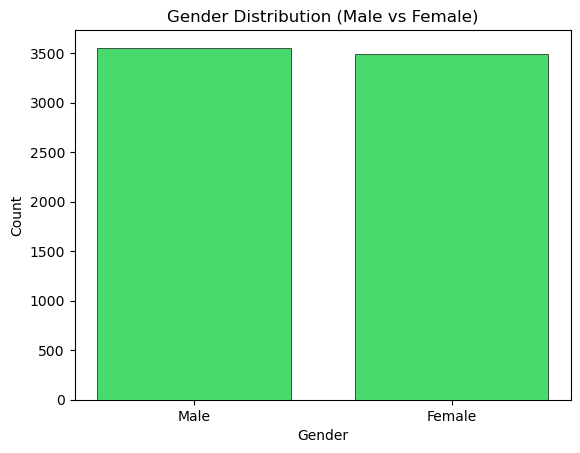

In [23]:
# Categorical Feature Analysis
gender_data=categorical_cols['Gender'].value_counts().reset_index()
plt.bar(gender_data['Gender'],gender_data['count'],**bar_style)
plt.title('Gender Distribution (Male vs Female)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

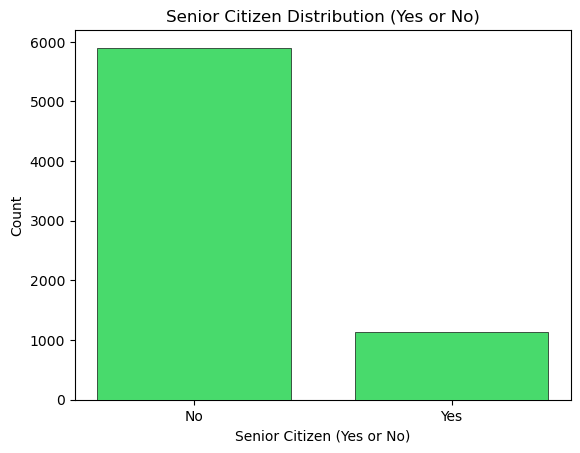

In [24]:
senior_citizen_data=categorical_cols['SeniorCitizen'].value_counts().reset_index()
senior_citizen_data['SeniorCitizen']=senior_citizen_data['SeniorCitizen'].map({0:'No',1:'Yes'}).astype(str)
plt.bar(senior_citizen_data['SeniorCitizen'],senior_citizen_data['count'],**bar_style)
plt.title('Senior Citizen Distribution (Yes or No)')
plt.xlabel('Senior Citizen (Yes or No)')
plt.ylabel('Count')
plt.show()

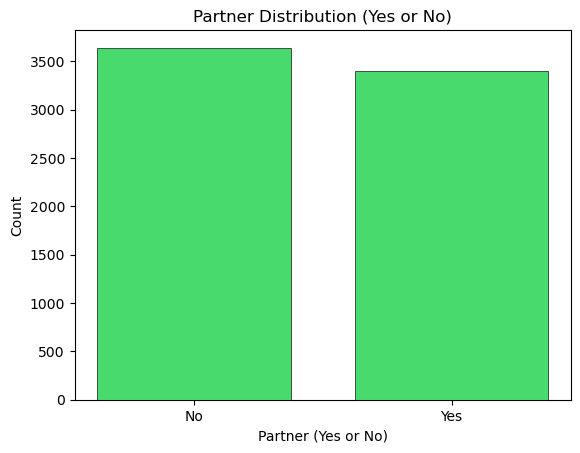

In [25]:
partner_data=categorical_cols['Partner'].value_counts().reset_index()
plt.bar(partner_data['Partner'],partner_data['count'],**bar_style)
plt.title('Partner Distribution (Yes or No)')
plt.xlabel('Partner (Yes or No)')
plt.ylabel('Count')
plt.show()

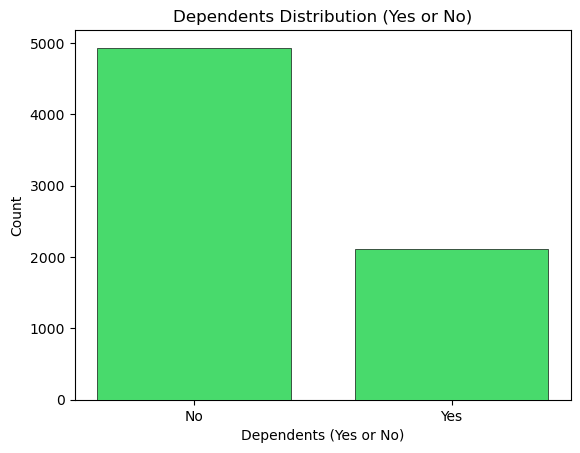

In [26]:
dependents_data=categorical_cols['Dependents'].value_counts().reset_index()
plt.bar(dependents_data['Dependents'],dependents_data['count'],**bar_style)
plt.title('Dependents Distribution (Yes or No)' )
plt.xlabel('Dependents (Yes or No)')
plt.ylabel('Count')
plt.show()

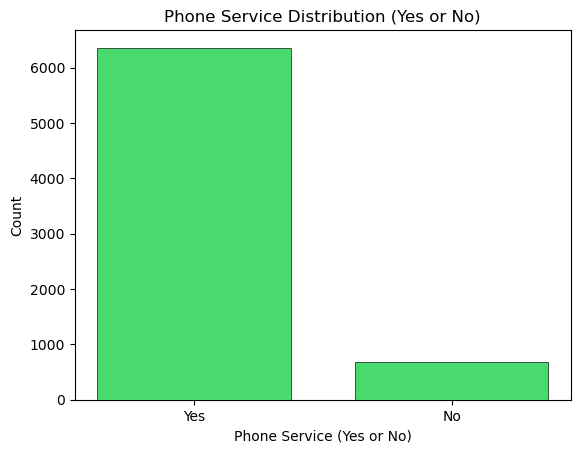

In [27]:
phone_service_data=categorical_cols['PhoneService'].value_counts().reset_index()
plt.bar(phone_service_data['PhoneService'],phone_service_data['count'],**bar_style)
plt.title('Phone Service Distribution (Yes or No)')
plt.xlabel('Phone Service (Yes or No)')
plt.ylabel('Count')
plt.show()

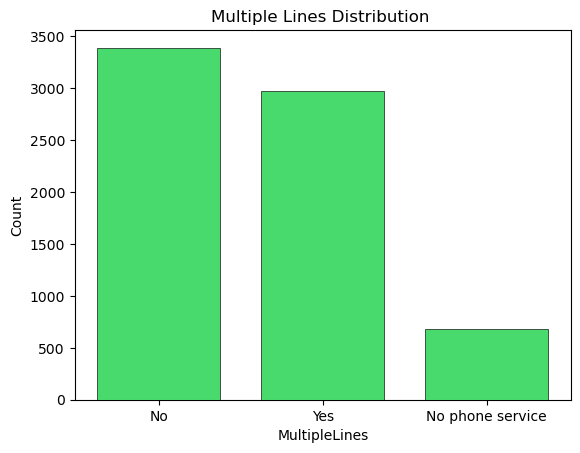

In [28]:
multiple_line_data=categorical_cols['MultipleLines'].value_counts().reset_index()
plt.bar(multiple_line_data['MultipleLines'],multiple_line_data['count'],**bar_style)
plt.title('Multiple Lines Distribution ')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.show()

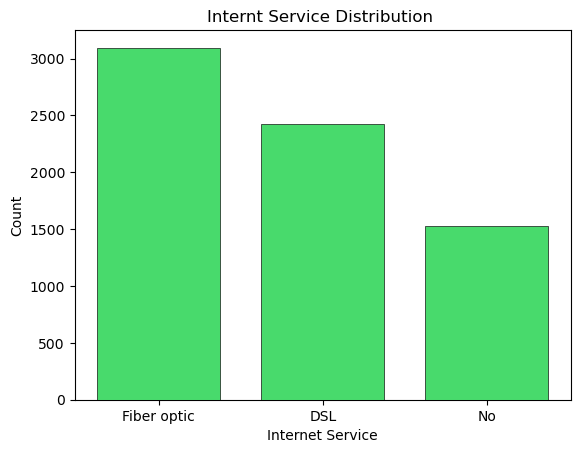

In [29]:
internet_service_data=categorical_cols['InternetService'].value_counts().reset_index()
plt.bar(internet_service_data['InternetService'],internet_service_data['count'],**bar_style)
plt.title('Internt Service Distribution ')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

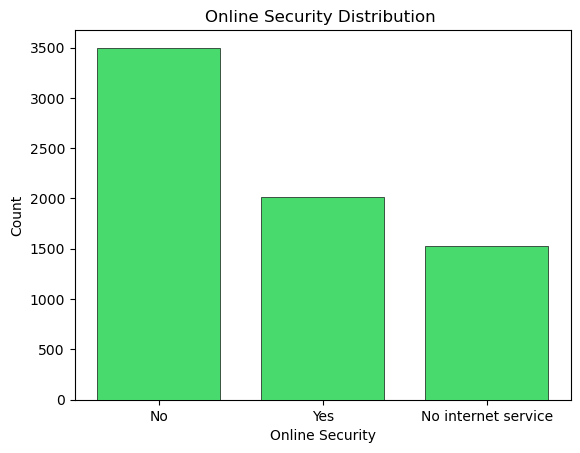

In [30]:
online_security_data=categorical_cols['OnlineSecurity'].value_counts().reset_index()
plt.bar(online_security_data['OnlineSecurity'],online_security_data['count'],**bar_style)
plt.title('Online Security Distribution ')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()


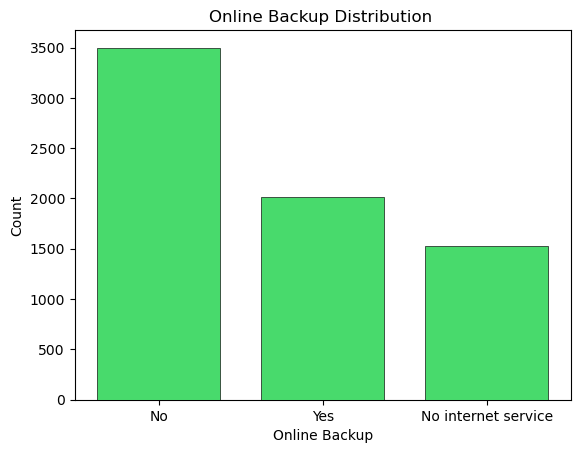

In [31]:
online_backup_data=categorical_cols['OnlineBackup'].value_counts().reset_index()
plt.bar(online_backup_data['OnlineBackup'],online_security_data['count'],**bar_style)
plt.title('Online Backup Distribution ')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.show()

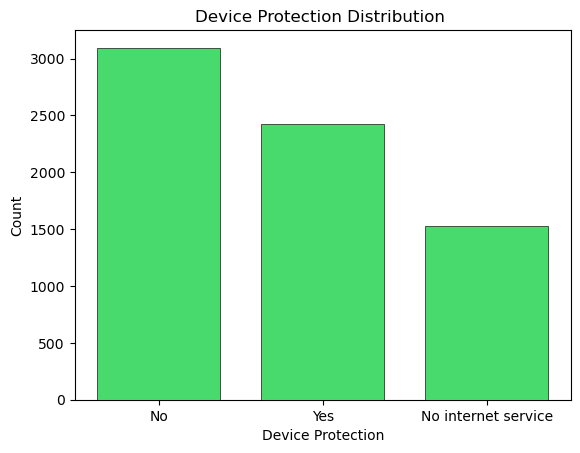

In [32]:
device_protection_data=categorical_cols['DeviceProtection'].value_counts().reset_index()
plt.bar(device_protection_data['DeviceProtection'],device_protection_data['count'],**bar_style)
plt.title('Device Protection Distribution ')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

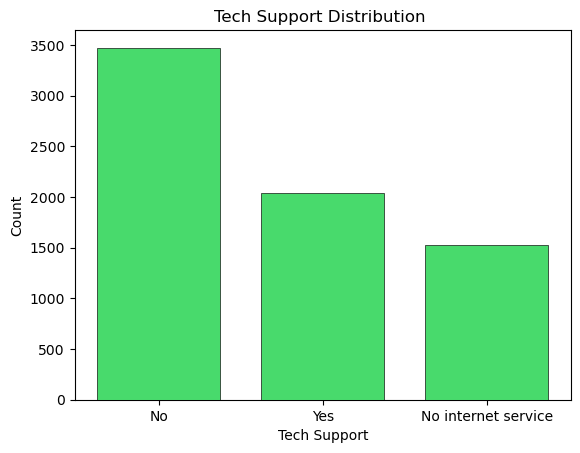

In [33]:
tech_support_data=categorical_cols['TechSupport'].value_counts().reset_index()
plt.bar(tech_support_data['TechSupport'],tech_support_data['count'],**bar_style)
plt.title('Tech Support Distribution ')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

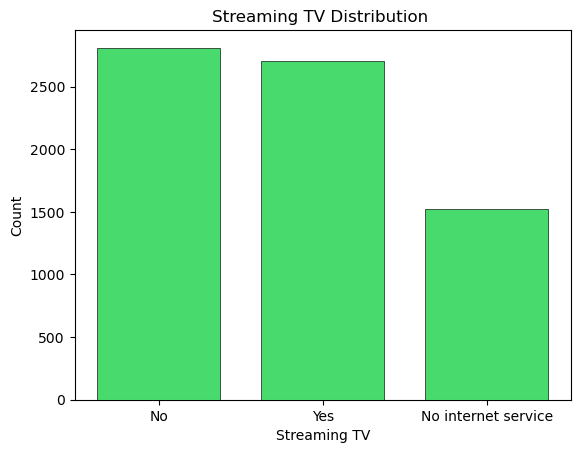

In [34]:
streaming_tv_data=categorical_cols['StreamingTV'].value_counts().reset_index()
plt.bar(streaming_tv_data['StreamingTV'],streaming_tv_data['count'],**bar_style)
plt.title('Streaming TV Distribution ')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

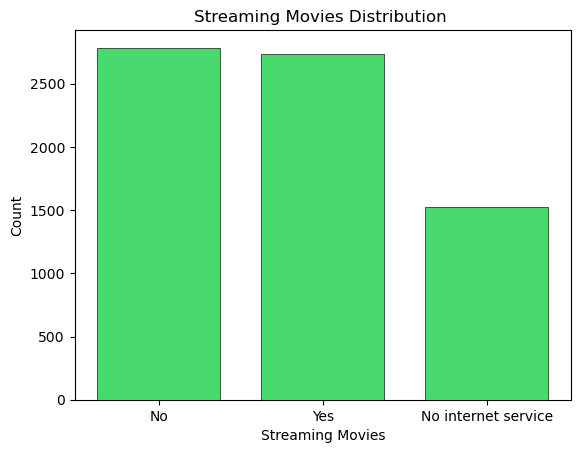

In [35]:
streaming_movies_data=categorical_cols['StreamingMovies'].value_counts().reset_index()
plt.bar(streaming_movies_data['StreamingMovies'],streaming_movies_data['count'],**bar_style)
plt.title('Streaming Movies Distribution ')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.show()


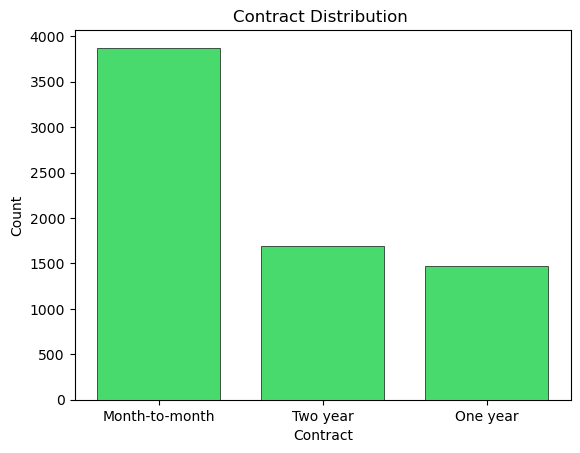

In [36]:
contract_data=categorical_cols['Contract'].value_counts().reset_index()
plt.bar(contract_data['Contract'],contract_data['count'],**bar_style)
plt.title('Contract Distribution ')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

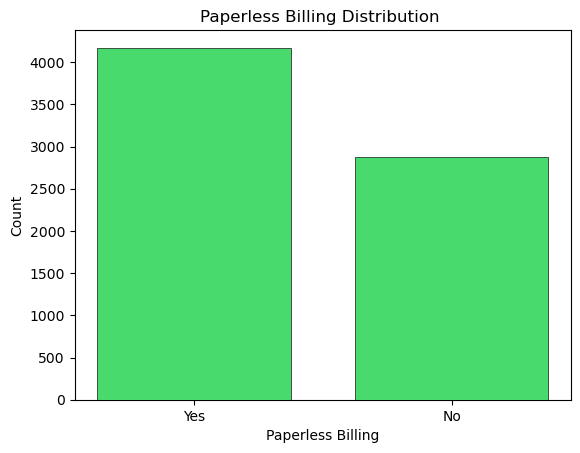

In [37]:
paperless_billing_data=categorical_cols['PaperlessBilling'].value_counts().reset_index()
plt.bar(paperless_billing_data['PaperlessBilling'],paperless_billing_data['count'],**bar_style)
plt.title('Paperless Billing Distribution ')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

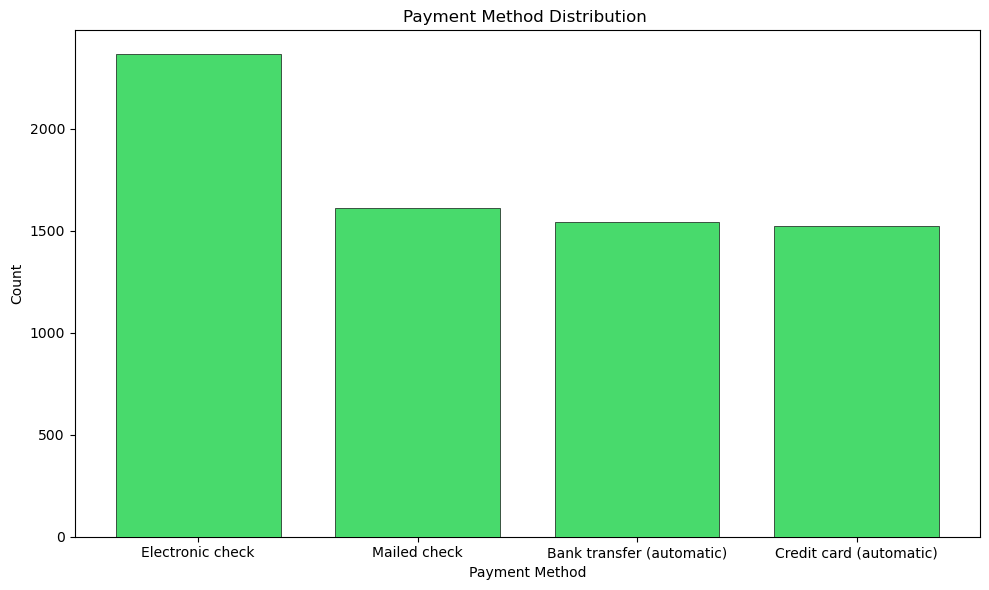

In [38]:
payment_method_data=categorical_cols['PaymentMethod'].value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.bar(payment_method_data['PaymentMethod'],payment_method_data['count'],**bar_style)
plt.title('Payment Method Distribution ')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [39]:
categorical_cols['PaymentMethod'].value_counts(normalize=True)


PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

## **Numerical Feature Analysis**

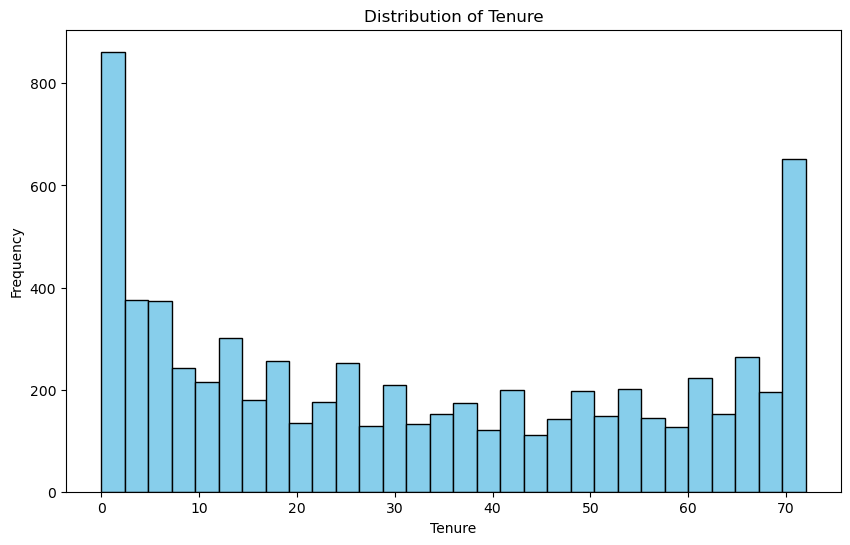

In [40]:
# Numerical Feature Analysis
plt.figure(figsize=(10,6))
plt.hist(numeric_cols['Tenure'],bins=30,color='skyblue',edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

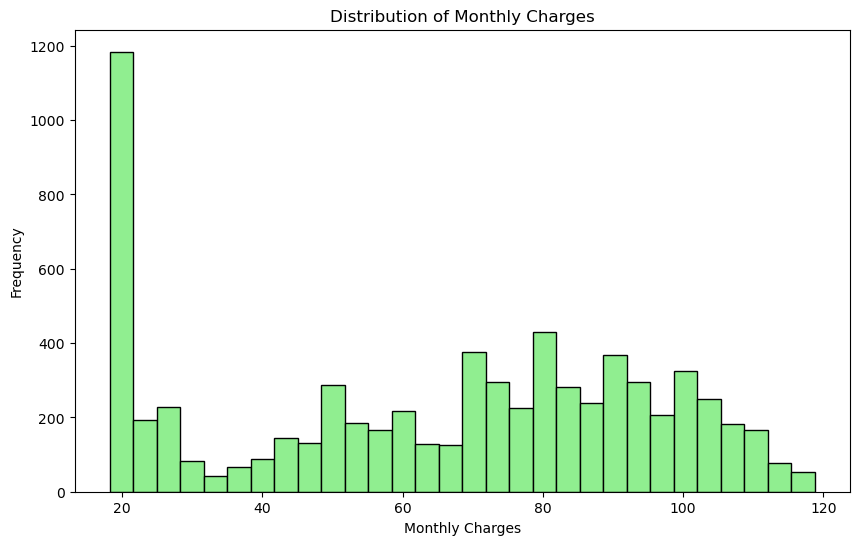

In [41]:
plt.figure(figsize=(10,6))
plt.hist(numeric_cols['MonthlyCharges'],bins=30,color='lightgreen',edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

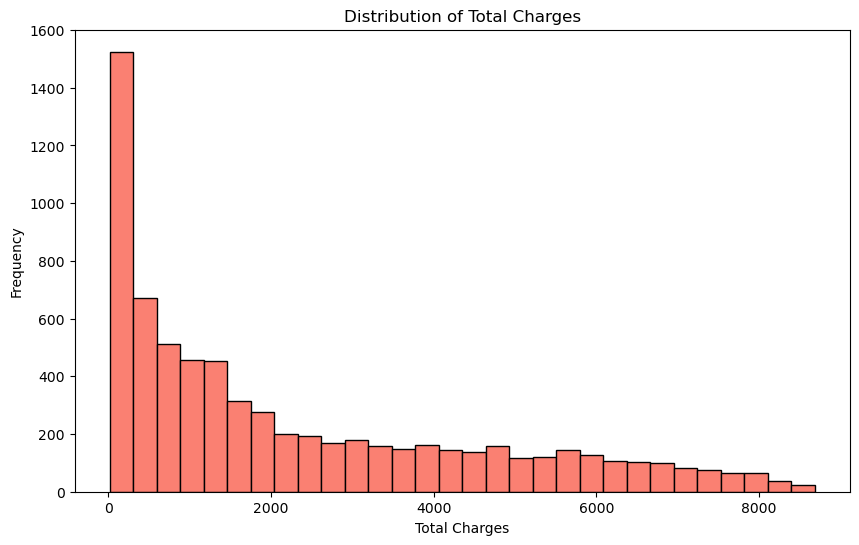

In [42]:
plt.figure(figsize=(10,6))
plt.hist(numeric_cols['TotalCharges'],bins=30,color='salmon',edgecolor='black')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

### Phase 3 – Key Observations

* **Gender:** The gender distribution is almost balanced, with a slightly higher proportion of male customers.
* **Senior Citizen:** Approximately **84% of customers are not senior citizens**, indicating a predominantly non-senior customer base.
* **Partner:** The distribution is nearly balanced (**52% vs 48%**), with a slightly higher proportion of customers without partners.
* **Dependents:** Around **71% of customers do not have dependents**.
* **Phone Service:** Approximately **90% of customers use phone services**.
* **Multiple Lines:** The distribution is imbalanced; **48% of customers do not use multiple lines**, **42% use multiple lines**, and around **9% do not have phone service**.
* **Internet Service:** The majority of customers (**44%**) use **fiber optic** internet, followed by **DSL (34%)**, while **22% do not use internet services**.
* **Online Security:** About **50% of customers do not use online security services**, **28% use the service**, and the remaining customers do not have internet service.
* **Online Backup:** Around **43% of customers use online backup**, **34% do not**, while the rest do not have internet service.
* **Device Protection:** Approximately **43% of customers use device protection services**, **34% do not**, and the remaining customers do not use internet services.
* **Tech Support:** Nearly **50% of customers do not use tech support**, **29% use the service**, and the rest do not have internet service.
* **Streaming TV:** Among customers with internet service, usage is balanced — **39% use streaming TV**, **38% do not**, while the remaining customers do not have internet service.
* **Streaming Movies:** Similar to streaming TV, usage is balanced — **39% use streaming movies**, **38% do not**, and the rest do not have internet service.
* **Contract:** The majority of customers (**55%**) are on **month-to-month contracts**, followed by **two-year contracts (24%)**, with the remainder on **one-year contracts**.
* **Paperless Billing:** **60% of customers use paperless billing**, while **40% do not**.
* **Payment Method:** The most common payment method is **electronic check (33%)**, followed by **mailed check (22%)**, **bank transfer (automatic) (21%)**, and **credit card (automatic)**.

---
 

---
# **Bivariate Analysis**

In [58]:
churned_customers = df[df['Churn'] == 'Yes']

,Contract,No,Yes
0,Month-to-month,2220,1655
1,One year,1307,166
2,Two year,1647,48


## **Categorical Features Analysis of Churned Customers**

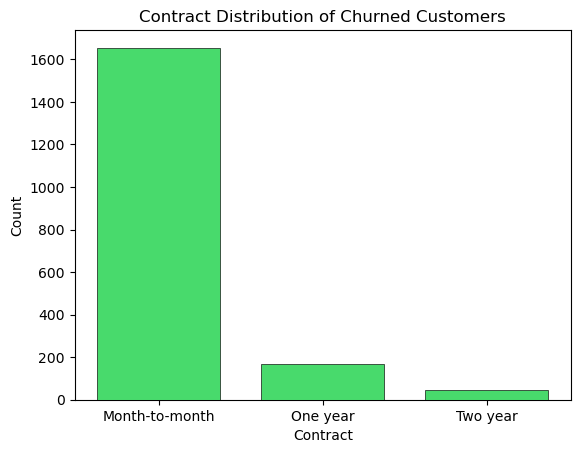

In [67]:
churned_by_contract=churned_customers.groupby('Contract').size().reset_index(name='Count')
plt.bar(churned_by_contract['Contract'],churned_by_contract['Count'],**bar_style)
plt.title('Contract Distribution of Churned Customers')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

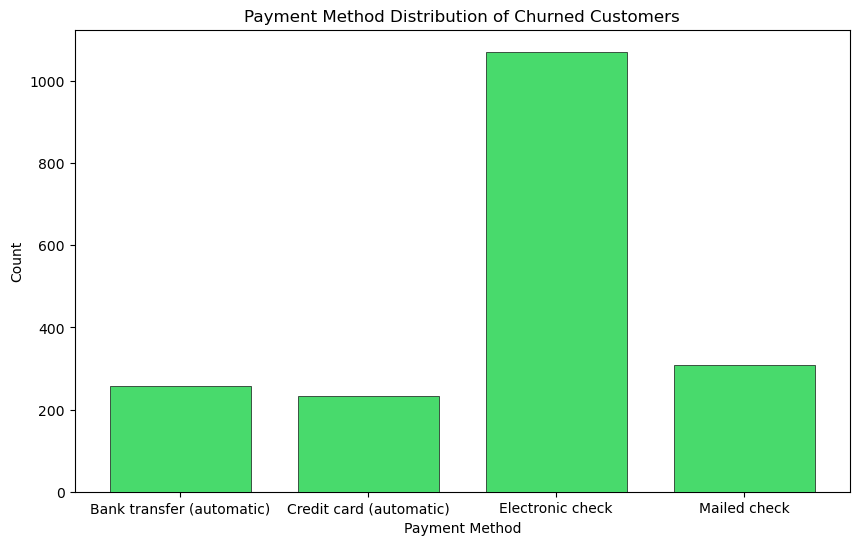

In [70]:
churned_by_paymentmethod=churned_customers.groupby('PaymentMethod').size().reset_index(name='Count')
plt.figure(figsize=(10,6))
plt.bar(churned_by_paymentmethod['PaymentMethod'],churned_by_paymentmethod['Count'],**bar_style)
plt.title('Payment Method Distribution of Churned Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

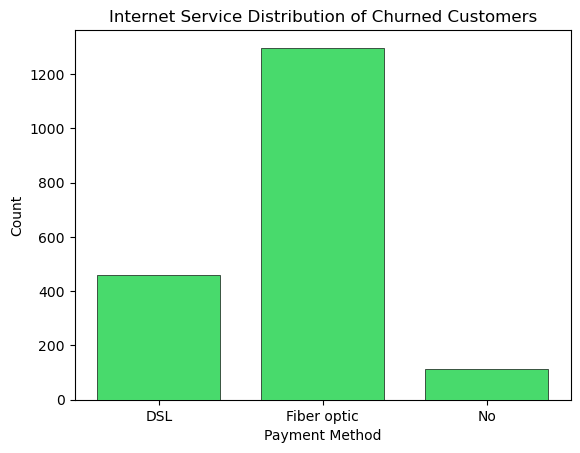

In [73]:
chunred_by_internetservice=churned_customers.groupby('InternetService').size().reset_index(name='Count')
plt.bar(chunred_by_internetservice['InternetService'],chunred_by_internetservice['Count'],**bar_style)
plt.title('Internet Service Distribution of Churned Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

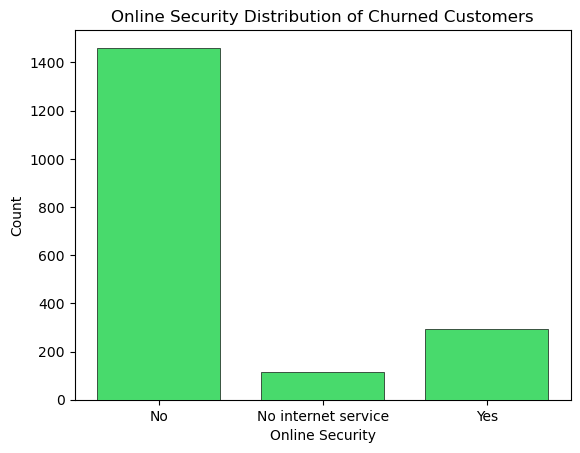

In [74]:
churned_by_onlinesecurity=churned_customers.groupby('OnlineSecurity').size().reset_index(name='Count')
plt.bar(churned_by_onlinesecurity['OnlineSecurity'],churned_by_onlinesecurity['Count'],**bar_style)
plt.title('Online Security Distribution of Churned Customers')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()

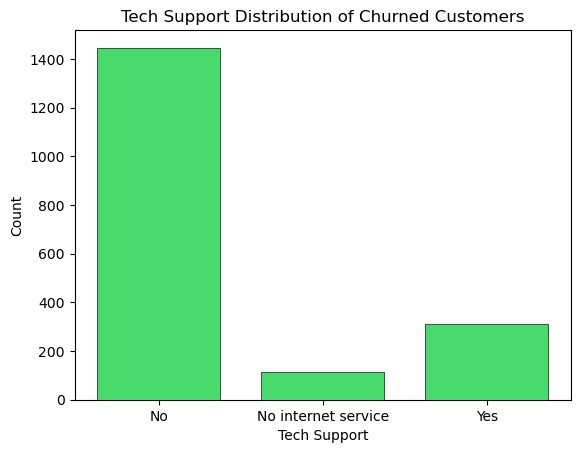

In [76]:
churned_by_techsupport=churned_customers.groupby('TechSupport').size().reset_index(name='Count')
plt.bar(churned_by_techsupport['TechSupport'],churned_by_techsupport['Count'],**bar_style)
plt.title('Tech Support Distribution of Churned Customers')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

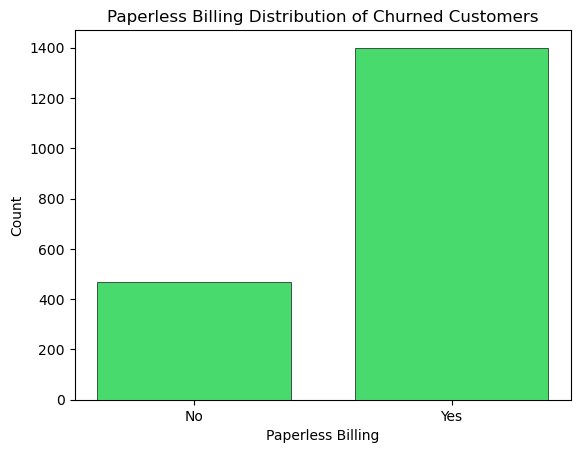

In [77]:
churned_by_paperlessbilling=churned_customers.groupby('PaperlessBilling').size().reset_index(name='Count')
plt.bar(churned_by_paperlessbilling['PaperlessBilling'],churned_by_paperlessbilling['Count'],**bar_style)
plt.title('Paperless Billing Distribution of Churned Customers')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

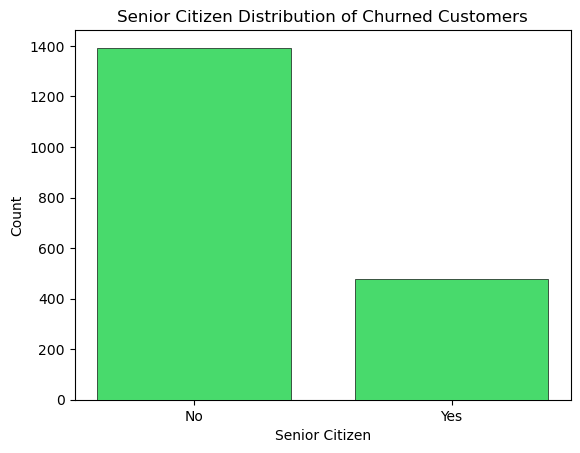

In [81]:
churned_by_seniorcitizen=churned_customers.groupby('SeniorCitizen').size().reset_index(name='Count')
churned_by_seniorcitizen['SeniorCitizen']=churned_by_seniorcitizen['SeniorCitizen'].map({0:'No',1:'Yes'}).astype(str)
plt.bar(churned_by_seniorcitizen['SeniorCitizen'],churned_by_seniorcitizen['Count'],**bar_style)
plt.title('Senior Citizen Distribution of Churned Customers')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

## **Numerical Features Analysis of Churned Customers**
